---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

-  With the **improving banking sector** in recent times and the **increasing trend** of **taking loans**, a large population applies for bank loans. 

- But one of the **major problem banking sectors** face in this ever-changing economy is the **increasing rate** of **loan defaults**. 

- The banking **authorities** are finding it more **difficult** to **correctly** **assess loan requests** and tackle the risks of people defaulting on loans. 

- The two most critical questions in the banking industry are 
    - (i) How risky is the borrower?, and 

    - (ii) Given the borrower’s risk, should we lend him/her?

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Financial institutions incur **significant losses** due to the default of **vehicle loans**.

- It has led to the **tightening up** of vehicle loan underwriting and increased vehicle **loan rejection rates**.

- These institutions need and raise a **requirement** for a **better credit risk assessment model**.

- It warrants a **study** to **estimate** the **determinants** of vehicle loan default.
 

<center><img src="https://gitlab.com/coldperformer/multimedia/-/raw/main/machine-learning-projects/Images/03-l&t-loan-default.jpg"></center>

**<h4>Scenario:</h4>**

-  A financial institution has hired you to accurately **predict** the **probability** of loanee/borrower **defaulting** on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. 

-  Following Information regarding the loan and loanee are provided in the datasets:
    - Loanee Information (Demographic data like age, Identity proof etc.)
    - Loan Information (Disbursal details, loan to value ratio etc.)
    - Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)
    
- Doing so will ensure that **clients capable** of **repayment** are not rejected and important **determinants** can be **identified**.

- This process can be further used for **minimising** the **default rates**.


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [ ]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data
!pip install -q --upgrade yellowbrick                               # A data visualization library
!pip install -q --upgrade imbalanced-learn                          # Toolbox for imbalanced dataset

<a name = Section32></a>
### **3.2 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)                        
from sklearn.preprocessing import StandardScaler                    # To sccale input features of the model
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # To calculate accuracy score of the model   
from sklearn.metrics import precision_score                         # To calculate precision score of the model
from sklearn.metrics import recall_score                            # To calculate recall score of the model
from sklearn.metrics import f1_score                                # To calculate f1 score of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression                 # To develop logistic regression classifier
from sklearn.ensemble import RandomForestClassifier                 # To develop random forest classifier
from xgboost.sklearn import XGBClassifier                           # To develop xtreme gradient boosting classifier
from imblearn.over_sampling import SMOTE                            # To perform oversampling of the sample data
#-------------------------------------------------------------------------------------------------------------------------------
from powerbiclient import Report                                    # To load Power BI reports in the notebook
from powerbiclient.authentication import DeviceCodeLoginAuthentication # To authenticate Power BI MS Azure CLI
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset for loan default prediction is provided by L&T along with the respective data description as shown below.

</br>

| Records | Features | Size |
| :--: | :--: | :--: |
| 233154 | 41 | 39.8 MB|

</br>

| ID | Variable Name       | Description                                                | # | ID | Variable Name                       | Description                                                                        |
| :--: | :------------------- | :---------------------------------------------------------- | :-- | :--: | :----------------------------------- | :---------------------------------------------------------------------------------- |
| 1  | **UniqueID**            | Identifier for customers                                   | # | 22 | **PERFORM\_CNS.SCORE.DESCRIPTION**      | Bureau score description                                                           |
| 2  | **loan\_default**       | Payment default in the first EMI on due date               | # | 23 | **PRI.NO.OF.ACCTS**                     | count of total loans taken by the customer at the time of disbursement             |
| 3  | **disbursed\_amount**   | Amount of Loan disbursed                                   | # | 24 | **PRI.ACTIVE.ACCTS**                    | count of active loans taken by the customer at the time of disbursement            |
| 4  | **asset\_cost**         | Cost of the Asset                                          | # | 25 | **PRI.OVERDUE.ACCTS**                   | count of default accounts at the time of disbursement                              |
| 5  | **ltv**                 | Loan to Value of the asset                                 | # | 26 | **PRI.CURRENT.BALANCE**                 | total Principal outstanding amount of the active loans at the time of disbursement |
| 6  | **branch\_id**          | Branch where the loan was disbursed                        | # | 27 | **PRI.SANCTIONED.AMOUNT**               | total amount that was sanctioned for all the loans at the time of disbursement     |
| 7  | **supplier\_id**        | Vehicle Dealer where the loan was disbursed                | # | 28 | **PRI.DISBURSED.AMOUNT**                | total amount that was disbursed for all the loans at the time of disbursement      |
| 8  | **manufacturer\_id**    | Vehicle manufacturer(Hero, Honda, TVS etc.)                | # | 29 | **SEC.NO.OF.ACCTS**                     | count of total loans taken by the customer at the time of disbursement             |
| 9  | **Current\_pincode**    | Current pincode of the customer                            | # | 30 | **SEC.ACTIVE.ACCTS**                    | count of active loans taken by the customer at the time of disbursement            |
| 10 | **Date.of.Birth**       | Date of birth of the customer                              | # | 31 | **SEC.OVERDUE.ACCTS**                   | count of default accounts at the time of disbursement                              |
| 11 | **Employment.Type**     | Employment Type of the customer (Salaried/Self Employed)   | # | 32 | **SEC.CURRENT.BALANCE**                 | total Principal outstanding amount of the active loans at the time of disbursement |
| 12 | **DisbursalDate**       | Date of disbursement                                       | # | 33 | **SEC.SANCTIONED.AMOUNT**               | total amount that was sanctioned for all the loans at the time of disbursement     |
| 13 | **State\_ID**           | State of disbursement                                      | # | 34 | **SEC.DISBURSED.AMOUNT**                | total amount that was disbursed for all the loans at the time of disbursement      |
| 14 | **Employee\_code\_ID**  | Employee of the organization who logged the disbursement   | # | 35 | **PRIMARY.INSTAL.AMT**                  | EMI Amount of the primary loan                                                     |
| 15 | **MobileNo\_Avl\_Flag** | if Mobile no. was shared by the customer then flagged as 1 | # | 36 | **SEC.INSTAL.AMT**                      | EMI Amount of the secondary loan                                                   |
| 16 | **Aadhar\_flag**        | if aadhar was shared by the customer then flagged as 1     | # | 37 | **NEW.ACCTS.IN.LAST.SIX.MONTHS**        | New loans taken by the customer in last 6 months before the disbursment            |
| 17 | **PAN\_flag**           | if pan was shared by the customer then flagged as 1        | # | 38 | **DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS** | Loans defaulted in the last 6 months                                               |
| 18 | **VoterID\_flag**       | if voter  was shared by the customer then flagged as 1     | # | 39 | **AVERAGE.ACCT.AGE**                    | Average loan tenure                                                                |
| 19 | **Driving\_flag**       | if DL was shared by the customer then flagged as 1         | # | 40 | **CREDIT.HISTORY.LENGTH**               | Time since first loan                                                              |
| 20 | **Passport\_flag**      | if passport was shared by the customer then flagged as 1   | # | 41 | **NO.OF\_INQUIRIES**                    | Enquries done by the customer for loans                                            |
| 21 | **PERFORM\_CNS.SCORE**  | Bureau Score                                               | # |    |                                     |                                                                                    |

In [ ]:
data = pd.read_csv(filepath_or_buffer='https://gitlab.com/coldperformer/multimedia/-/raw/main/machine-learning-projects/data/07-l&t-loan-default-train.csv?inline=false')
print('Data Shape:', data.shape)
data.head()

Data Shape: (233154, 41)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the train data** and see some observations.

In [ ]:
data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00,233154.00
mean,535917.57,54356.99,75865.07,74.75,72.94,19638.64,69.03,3396.88,7.26,1549.48,1.00,0.84,0.08,0.14,0.02,0.00,289.46,2.44,1.04,0.16,165900.08,218503.86,218065.90,0.06,0.03,0.01,5427.79,7295.92,7180.00,13105.48,323.27,0.38,0.10,0.21,0.22
std,68315.69,12971.31,18944.78,11.46,69.83,3491.95,22.14,2238.15,4.48,975.26,0.00,0.37,0.26,0.35,0.15,0.05,338.37,5.22,1.94,0.55,942273.58,2374794.13,2377743.85,0.63,0.32,0.11,170236.99,183155.99,182592.50,151367.90,15553.69,0.96,0.38,0.71,0.41
min,417428.00,13320.00,37000.00,10.03,1.00,10524.00,45.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6678296.00,0.00,0.00,0.00,0.00,0.00,-574647.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,476786.25,47145.00,65717.00,68.88,14.00,16535.00,48.00,1511.00,4.00,713.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,535978.50,53803.00,70946.00,76.80,61.00,20333.00,86.00,2970.00,6.00,1451.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,595039.75,60413.00,79201.75,83.67,130.00,23000.00,86.00,5677.00,10.00,2362.00,1.00,1.00,0.00,0.00,0.00,0.00,678.00,3.00,1.00,0.00,35006.50,62500.00,60800.00,0.00,0.00,0.00,0.00,0.00,0.00,1999.00,0.00,0.00,0.00,0.00,0.00
max,671084.00,990572.00,1628992.00,95.00,261.00,24803.00,156.00,7345.00,22.00,3795.00,1.00,1.00,1.00,1.00,1.00,1.00,890.00,453.00,144.00,25.00,96524920.00,1000000000.00,1000000000.00,52.00,36.00,8.00,36032852.00,30000000.00,30000000.00,25642806.00,4170901.00,35.00,20.00,36.00,1.00


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

**Observations:**

- We observed that there are **no null values** but **inconsistency** in data types.

- Features such as "**Date.of.Birth**" and "**DisbursalDate**" have been identified as an **object type**; **instead**, they should be of **date type**.

- Following set of features have been identified as an **integer type**; **instead**, they should be of **boolean type**.

    - MobileNo_Avl_Flag, Aadhar_flag, PAN_flag, VoterID_flag, Driving_flag, Passport_flag 

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

**Observations:**

- The report shows that there are **overall 41 features**, out of which **28 are numeral**, and **13 are categorical** types.

- There exist missing data in cells of about 0.1% (7661).
	- Employment.Type has 7661 (3.3%) missing values

- **UniqueID** feature has **unique values** in the column.

- There are **no duplicate rows** in the dataset.

- Feature "**MobileNo_Avl_Flag**" has a constant value "**1**", can be dropped.

- The following set of features have a **high cardinality** in the dataset:
	- Date.of.Birth, DisbursalDate, AVERAGE.ACCT.AGE, CREDIT.HISTORY.LENGTH

- The correlation of features among each other is as follows:

    <details>

    **<summary>Correlation Details: Expand to view summary</summary>**

    - disbursed_amount is highly correlated with asset_cost
    - Aadhar_flag is highly correlated with VoterID_flag
    - PERFORM_CNS.SCORE is highly correlated with PRI.NO.OF.ACCTS
    - PRI.CURRENT.BALANCE is highly correlated with PERFORM_CNS.SCORE
    - PRI.SANCTIONED.AMOUNT is highly correlated with PERFORM_CNS.SCORE
    - PRI.DISBURSED.AMOUNT is highly correlated with PERFORM_CNS.SCORE
    - SEC.NO.OF.ACCTS is highly correlated with SEC.ACTIVE.ACCTS
    - SEC.CURRENT.BALANCE is highly correlated with SEC.NO.OF.ACCTS
    - SEC.SANCTIONED.AMOUNT is highly correlated with SEC.NO.OF.ACCTS
    - SEC.DISBURSED.AMOUNT is highly correlated with SEC.NO.OF.ACCTS
    - PRIMARY.INSTAL.AMT is highly correlated with PERFORM_CNS.SCORE
    - SEC.INSTAL.AMT is highly correlated with SEC.NO.OF.ACCTS
    - NEW.ACCTS.IN.LAST.SIX.MONTHS is highly correlated with PRI.NO.OF.ACCTS
    - PRI.NO.OF.ACCTS is highly correlated with PRI.ACTIVE.ACCTS
    - PRI.SANCTIONED.AMOUNT is highly correlated with PRI.DISBURSED.AMOUNT
    - SEC.OVERDUE.ACCTS is highly correlated with SEC.NO.OF.ACCTS
    - SEC.CURRENT.BALANCE is highly correlated with SEC.SANCTIONED.AMOUNT
    - SEC.DISBURSED.AMOUNT is highly correlated with SEC.CURRENT.BALANCE
    - PRI.ACTIVE.ACCTS is highly correlated with PERFORM_CNS.SCORE
    - SEC.ACTIVE.ACCTS is highly correlated with SEC.NO.OF.ACCTS
    - PRIMARY.INSTAL.AMT is highly correlated with PRI.NO.OF.ACCTS
    - Aadhar_flag is highly correlated with MobileNo_Avl_Flag
    - Driving_flag is highly correlated with MobileNo_Avl_Flag
    - Employment.Type is highly correlated with MobileNo_Avl_Flag
    - loan_default is highly correlated with MobileNo_Avl_Flag
    - PERFORM_CNS.SCORE.DESCRIPTION is highly correlated with MobileNo_Avl_Flag
    - DisbursalDate is highly correlated with MobileNo_Avl_Flag
    - Passport_flag is highly correlated with MobileNo_Avl_Flag
    - PAN_flag is highly correlated with MobileNo_Avl_Flag
    - UniqueID is highly correlated with DisbursalDate
    - branch_id is highly correlated with Current_pincode_ID
    - State_ID is highly correlated with branch_id
    - Aadhar_flag is highly correlated with State_ID
    - VoterID_flag is highly correlated with State_ID
    - PERFORM_CNS.SCORE is highly correlated with PERFORM_CNS.SCORE.DESCRIPTION
    - PRI.ACTIVE.ACCTS is highly correlated with PERFORM_CNS.SCORE.DESCRIPTION
    - PRI.CURRENT.BALANCE is highly correlated with PRI.ACTIVE.ACCTS
    - PRI.SANCTIONED.AMOUNT is highly correlated with PRI.ACTIVE.ACCTS
    - PRI.DISBURSED.AMOUNT is highly correlated with PRI.ACTIVE.ACCTS
    - SEC.CURRENT.BALANCE is highly correlated with SEC.ACTIVE.ACCTS
    - SEC.SANCTIONED.AMOUNT is highly correlated with SEC.ACTIVE.ACCTS
    - SEC.DISBURSED.AMOUNT is highly correlated with SEC.ACTIVE.ACCTS

    </details>


- The skewness details of features is as follows:

    <details>

    **<summary>Skewness Details: Expand to view summary</summary>**

    - PRI.CURRENT.BALANCE (γ1 = 29.42581325)
    - PRI.SANCTIONED.AMOUNT (γ1 = 323.6972121)
    - PRI.DISBURSED.AMOUNT (γ1 = 322.5414945)
    - SEC.NO.OF.ACCTS (γ1 = 27.98609032)
    - SEC.ACTIVE.ACCTS (γ1 = 30.59951015)
    - SEC.OVERDUE.ACCTS (γ1 = 24.12927125)
    - SEC.CURRENT.BALANCE (γ1 = 108.5062952)
    - SEC.SANCTIONED.AMOUNT (γ1 = 75.25493196)
    - SEC.DISBURSED.AMOUNT (γ1 = 75.76425191)
    - PRIMARY.INSTAL.AMT (γ1 = 69.91615647)
    - SEC.INSTAL.AMT (γ1 = 153.8063689)

    </details>


- The details of feature containing zeros can be find below.

    <details>

    **<summary>Zero Values Details: Expand to view summary</summary>**

    - PERFORM_CNS.SCORE - 116950 (50.2%)
    - PRI.NO.OF.ACCTS - 116950 (50.2%)
    - PRI.ACTIVE.ACCTS - 137016 (58.8%)
    - PRI.OVERDUE.ACCTS - 206879 (88.7%)
    - PRI.CURRENT.BALANCE - 141696 (60.8%)
    - PRI.SANCTIONED.AMOUNT - 138096 (59.2%)
    - PRI.DISBURSED.AMOUNT - 138204 (59.3%)
    - SEC.NO.OF.ACCTS - 227289 (97.5%)
    - SEC.ACTIVE.ACCTS - 229337 (98.4%)
    - SEC.OVERDUE.ACCTS - 231817 (99.4%)
    - SEC.CURRENT.BALANCE - 229790 (98.6%)
    - SEC.SANCTIONED.AMOUNT - 229418 (98.4%)
    - SEC.DISBURSED.AMOUNT - 229450 (98.4%)
    - PRIMARY.INSTAL.AMT - 159517 (68.4%)
    - SEC.INSTAL.AMT - 230937 (99.0%)
    - NEW.ACCTS.IN.LAST.SIX.MONTHS - 181494 (77.8%)
    - DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS - 214959 (92.2%)
    - NO.OF_INQUIRIES - 201961 (86.6%)

    </details>




<a name = Section52></a>
### **5.2 Data Cleaning**

- In this section, we will perform all the operations that are required to clean the dataset.

- We will utilize all the details obtained from the previous section.

In [ ]:
# Dropping null values from cells
data.dropna(inplace=True)

# Droping MobileNo_Avl_Flag from train and test data
data.drop(labels=['MobileNo_Avl_Flag'], axis=1, inplace=True)

# Transforming Date.of.Birth and DisbursalDate to datetime
data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'])
data['DisbursalDate'] = pd.to_datetime(data['DisbursalDate'])

# Transforming Aadhar_flag, PAN_flag, VoterID_flag, 
# Driving_flag, Passport_flag to boolean type
data['Aadhar_flag'] = data['Aadhar_flag'].astype(np.bool)
data['PAN_flag'] = data['PAN_flag'].astype(np.bool)
data['VoterID_flag'] = data['VoterID_flag'].astype(np.bool)
data['Driving_flag'] = data['Driving_flag'].astype(np.bool)
data['Passport_flag'] = data['Passport_flag'].astype(np.bool)

**Observations:**

- We have successfully cleansed our dataset.

- To verify, let's have a quick glance at the pandas profiling report.

<a name = Section53></a>
### **5.3 Post Profiling Report**

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- We can observe that inconsistent data types have been rectified.

- There is no missing data and after performing all the operations, there isn't any major change in the dataset.

In [ ]:
data.to_csv('l&t-cleansed-data.csv', index=False)

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**Note:**

- Results of the following report might not be visible becuase of the rendering constraints.
- To view the results, kindly upload the attached <a href="https://gitlab.com/senior-research-team/dashboard/-/raw/main/01-L_T-Loan-Default-Analysis.pbix?inline=false">power bi report</a> to your personal workspace.
- Replace your report's group_id and report_id in the following variables and authenticate your connection.

In [ ]:
# Initiate device authentication: redirect to the 
device_auth = DeviceCodeLoginAuthentication()

group_id = "799d8379-dda6-4ea6-90a4-82a96f1d82c6"
report_id = "920d9864-218c-4b94-9ede-fd326246b862"

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code SKGZ8HB33 to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [ ]:
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)
report

Report()

<a name = Section7></a>

---
# **7. Data Post-Processing**
---

<a name = Section71></a>
### **7.1 Feature Encoding**

- In this section, we will perform **transformation** over categorical features to get numeric form.

In [ ]:
print('Count', '\t: ', 'Feature')
for feature in data.columns:
    if data[feature].dtype == object:
        count = len(data[feature].unique())
        print(count, '\t: ', feature)

Count 	:  Feature
2 	:  Employment.Type
20 	:  PERFORM_CNS.SCORE.DESCRIPTION
192 	:  AVERAGE.ACCT.AGE
291 	:  CREDIT.HISTORY.LENGTH


**Observations:**

- Using above output, we will do as following: 

    - Employment.Type &rarr; One hot encoding

    - PERFORM_CNS.SCORE.DESCRIPTION &rarr; Drop the feature

    - AVERAGE.ACCT.AGE &rarr; Extract number and normalize to months
    
    - CREDIT.HISTORY.LENGTH &rarr; Extract number and normalize to months

In [ ]:
# One hot encoding over Employment.Type
data = pd.get_dummies(data=data, columns=['Employment.Type'])

# Dropping unnecessary feature from the dataset 
data.drop(labels=['PERFORM_CNS.SCORE.DESCRIPTION'], axis=1, inplace=True)

# Extracting year and month and normalizing to months only
for column in ['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']:
    year = data[column].apply(lambda x: x.split(' ')[0].replace('yrs', '')).astype(int)
    month = data[column].apply(lambda x: x.split(' ')[1].replace('mon', '')).astype(int)
    data[column] = year * 12 + month

<a name = Section72></a>
### **7.2 Feature Scaling**

- In this section, we will perform data scaling over the features that may impact the outcome of models.

In [ ]:
# Dropping identifiers from the dataset
identifiers = ['UniqueID', 'branch_id', 'supplier_id',  'Current_pincode_ID', 
               'Employee_code_ID', 'supplier_id', 'branch_id', 'State_ID', 'manufacturer_id']
data.drop(labels=identifiers, axis=1, inplace=True)

In [ ]:
scaler = StandardScaler()
dropper = ['loan_default', 'Date.of.Birth', 'DisbursalDate']
X_scaled = scaler.fit_transform(data.drop(dropper, axis=1))

**Observations:**

- Now that we have performing scaling over the data, let's move ahead to identify essential features for the model development.

<a name = Section73></a>
### **7.3 Feature Selection**

- Now in the real world, it is very rare that all the **features** are **important** while developing the **model**.

- Instead, we analyze the **impact** of **input** feature values over the **target** feature values.

- It is either done by performing **statistical tests** (Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- Random forests are one of the most **popular** machine learning **algorithms**.

- They provide good predictive performance, low overfitting, and easy interpretability.

- This **interpretability** is derived from the importance of each feature on the tree decision evaluated the **reduction in impurity**.

- In other words, it is **easy** to **compute** how much each feature is **contributing** to the decision.

- We will implement **SelectFromModel()** available in Sklearn which uses the base estimator to identify important features.

- The importance of a feature is determined based on a **threshold** (a measure to calculate feature importance).


In [ ]:
X_scaled_frame = pd.DataFrame(data=X_scaled, columns=data.drop(labels=dropper, axis=1).columns)
y = data['loan_default']

In [ ]:
# Have some patience, it may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
selector.fit(X_scaled_frame, y)

# Extracting list of important features
selected_feat = X_scaled_frame.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 10
Threshold set by Model: 0.03
Important Features: ['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']


**Visualzation of Important Features:**

- Below features are plotted against their absolute importance (in %age),  of each feature.

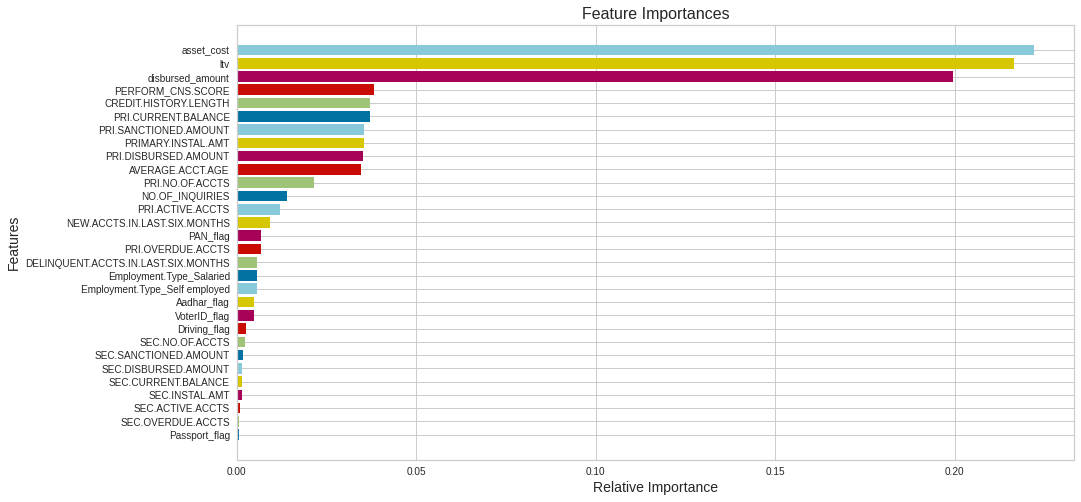

In [ ]:
# Have some patience, may take some time :)
figure = plt.figure(figsize=[15, 8])

# If you don't want relative importance, use relative=False in below method
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(X_scaled_frame, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

<a name = Section73></a>
### **7.3 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_frame[selected_feat], y, test_size=0.2, random_state=42, stratify=y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (180394, 10) (180394,)
Testing Data Shape: (45099, 10) (45099,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will develop variety of models such as Logistic Regression, Random Forest, and XGBoost.

- We will perform modelling in two ways, i.e. baseline model development and oversampling model development.

<a name=Section81></a>

## **8.1 Baseline Models**

In [ ]:
%%time

# Initialize a list of classifiers
classifiers = [LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, n_jobs=-1), 
               RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42, class_weight='balanced'), 
               XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=42)]

# Initialize lists of respective metrics
train_accuracies, test_accuracies = list(), list()
train_precisions, test_precisions = list(), list()
train_recalls, test_recalls = list(), list()
train_f1_scores, test_f1_scores = list(), list()

# Train classifiers one by one
for classifier in classifiers:
    classifier.fit(X_train, y_train)

    y_train_predict = classifier.predict(X_train)
    y_test_predict = classifier.predict(X_test)

    train_accuracies.append(accuracy_score(y_true=y_train, y_pred=y_train_predict))
    test_accuracies.append(accuracy_score(y_true=y_test, y_pred=y_test_predict))

    train_precisions.append(precision_score(y_true=y_train, y_pred=y_train_predict))
    test_precisions.append(precision_score(y_true=y_test, y_pred=y_test_predict))

    train_recalls.append(recall_score(y_true=y_train, y_pred=y_train_predict))
    test_recalls.append(recall_score(y_true=y_test, y_pred=y_test_predict))

    train_f1_scores.append(f1_score(y_true=y_train, y_pred=y_train_predict))
    test_f1_scores.append(f1_score(y_true=y_test, y_pred=y_test_predict))

# Aggregating information and displaying the results as a dataframe
train_results = [train_accuracies, test_accuracies, 
                 train_precisions, test_precisions, 
                 train_recalls, test_recalls, 
                 train_f1_scores, test_f1_scores]

metrics = ['Accuracy (Train)', 'Accuracy (Test)', 
           'Precision (Train)', 'Precision (Test)', 
           'Recall (Train)', 'Recall (Test)', 
           'F1_Score (Train)', 'F1_Score (Test)']

model_names = ['LogisticRegression', 'RandomForestClassifier', 'XGBoostClassifier']
baseline_result_frame = pd.DataFrame(data=train_results, columns=model_names, index=metrics)
baseline_result_frame.transpose()

CPU times: user 19min 14s, sys: 12.8 s, total: 19min 27s
Wall time: 9min 58s


In [ ]:
baseline_result_frame

,LogisticRegression,RandomForestClassifier,XGBoostClassifier
Accuracy (Train),0.53,0.99,0.78
Accuracy (Test),0.54,0.76,0.78
Precision (Train),0.26,0.96,0.80
Precision (Test),0.27,0.31,0.48
Recall (Train),0.64,0.99,0.01
Recall (Test),0.65,0.08,0.00
F1_Score (Train),0.37,0.98,0.01
F1_Score (Test),0.38,0.13,0.01


<a name=Section82></a>

## **8.2 Oversampling Models**

In [ ]:
print('Training Data Shape (Old):', X_train.shape, y_train.shape)
print('Testing Data Shape (Old):', X_test.shape, y_test.shape)

sm = SMOTE(random_state=42)
X1, y1 = sm.fit_resample(X_scaled_frame[selected_feat], y)
X_new = pd.DataFrame(data=X1, columns=X_scaled_frame[selected_feat].columns)
X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size=0.2, random_state=42, stratify=y1)

print('\nTraining Data Shape (New):', X_train.shape, y_train.shape)
print('Testing Data Shape (New):', X_test.shape, y_test.shape)

Training Data Shape (Old): (180394, 10) (180394,)
Testing Data Shape (Old): (45099, 10) (45099,)

Training Data Shape (New): (282441, 10) (282441,)
Testing Data Shape (New): (70611, 10) (70611,)


In [ ]:
%%time

# Initialize a list of classifiers
classifiers = [LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, n_jobs=-1), 
               RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42, class_weight='balanced'), 
               XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=42)]

# Initialize lists of respective metrics
train_accuracies, test_accuracies = list(), list()
train_precisions, test_precisions = list(), list()
train_recalls, test_recalls = list(), list()
train_f1_scores, test_f1_scores = list(), list()

# Train classifiers one by one
for classifier in classifiers:
    classifier.fit(X_train, y_train)

    y_train_predict = classifier.predict(X_train)
    y_test_predict = classifier.predict(X_test)

    train_accuracies.append(accuracy_score(y_true=y_train, y_pred=y_train_predict))
    test_accuracies.append(accuracy_score(y_true=y_test, y_pred=y_test_predict))

    train_precisions.append(precision_score(y_true=y_train, y_pred=y_train_predict))
    test_precisions.append(precision_score(y_true=y_test, y_pred=y_test_predict))

    train_recalls.append(recall_score(y_true=y_train, y_pred=y_train_predict))
    test_recalls.append(recall_score(y_true=y_test, y_pred=y_test_predict))

    train_f1_scores.append(f1_score(y_true=y_train, y_pred=y_train_predict))
    test_f1_scores.append(f1_score(y_true=y_test, y_pred=y_test_predict))

# Aggregating information and displaying the results as a dataframe
train_results = [train_accuracies, test_accuracies, 
                 train_precisions, test_precisions, 
                 train_recalls, test_recalls, 
                 train_f1_scores, test_f1_scores]

metrics = ['Accuracy (Train)', 'Accuracy (Test)', 
           'Precision (Train)', 'Precision (Test)', 
           'Recall (Train)', 'Recall (Test)', 
           'F1_Score (Train)', 'F1_Score (Test)']

model_names = ['LogisticRegression', 'RandomForestClassifier', 'XGBoostClassifier']
oversampling_result_frame = pd.DataFrame(data=train_results, columns=model_names, index=metrics)
oversampling_result_frame.transpose()

CPU times: user 37min 39s, sys: 40 s, total: 38min 19s
Wall time: 19min 44s


In [ ]:
oversampling_result_frame

,LogisticRegression,RandomForestClassifier,XGBoostClassifier
Accuracy (Train),0.57,0.99,0.71
Accuracy (Test),0.57,0.79,0.71
Precision (Train),0.56,0.99,0.71
Precision (Test),0.56,0.78,0.71
Recall (Train),0.64,1.00,0.73
Recall (Test),0.64,0.80,0.72
F1_Score (Train),0.60,0.99,0.72
F1_Score (Test),0.60,0.79,0.71


**Observations:**

- We can observe that **oversampled models performed better** as compared to the baseline models.

- Random Forest classifier performed great but test results are not good as compared to the train results.

- XGBoost Classifier and Logistic Regression, on the other hand, performed very good in terms of **generalizing**.

- We can test out both RandomForest and XGBoost for next one month to get a better idea about their performances.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We **analyzed** and understood the **behavior** of the data and performed manipulations accordingly.

- We **performed several transformations** over the l&t loan data as per the requirement.

- We **tried** out Logistic Regression, Random Forest, and XGBoost algorithm both by **baseline** and **oversampling**.

- It turns out that the **oversampled Random Forest** and **XGBoost model** gave us **good results**.

- We can choose either one, but we should always select a **generalized model** with **better scores**.